In [664]:
import pandas as pd
import seaborn as sns
import requests
import numpy as np
import re

In [665]:
#DATA SET 1 - MOVIE DATA
moviesDF = pd.read_csv("movie_statistic_dataset.csv")
moviesDF

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,2004-05-07,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078.0,6.017902,65000,11529368,22233808
4376,The Brothers McMullen,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986.0,4.231464,50000,10426506,10426506
4377,Gabriela,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593.0,2.526405,50000,2335352,2335352
4378,Tiny Furniture,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595.0,4.242085,50000,391674,424149


In [666]:
# creation of relative age - not actually used in project
moviesDF = moviesDF.sort_values("runtime_minutes",ascending=False)
moviesDF["relative_age"] = moviesDF["production_date"].apply(lambda x: int(x[:4]) * 10000 + int(x[5:7]) * 100 + int(x[8:]))

moviesDF

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,relative_age
2114,Gettysburg,1993-10-08,"Drama,History,War",271.0,Ron Maxwell,"director,producer,writer",1949,alive,7.6,29736.0,5.627693,25000000,10731997,10731997,19931008
2414,The Greatest Story Ever Told,1965-02-15,"Biography,Drama,History",260.0,-,-,-,-,6.5,10764.0,4.308116,20000000,15473333,15473333,19650215
2591,Hamlet,1996-12-25,Drama,242.0,Kenneth Branagh,"actor,producer,director",1960,alive,7.8,38679.0,5.930156,18000000,4501094,7129670,19961225
3850,Gone with the Wind,1939-12-15,"Drama,Romance,War",238.0,-,-,-,-,8.2,318573.0,7.513152,3900000,198680470,390525192,19391215
1857,Once Upon a Time in America,1984-06-01,"Crime,Drama",229.0,Sergio Leone,"assistant_director,writer,director",1929,1989,8.3,355467.0,7.673301,30000000,5321508,5576072,19840601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,Brothers,2015-08-13,Documentary,68.0,Wojciech Staron,"cinematographer,camera_department,miscellaneous",1973,alive,7.4,81.0,2.260754,13000000,656688,17856688,20150813
4337,She Done Him Wrong,1933-02-09,"Comedy,Drama,History",66.0,Lowell Sherman,"actor,director,producer",1888,1934,6.3,6346.0,3.926585,200000,2200000,2200000,19330209
4139,Playback,2012-03-16,Documentary,66.0,-,-,-,-,6.0,16.0,1.092132,1500000,264,54945,20120316
376,The Hunchback of Notre Dame,1996-06-21,Animation,65.0,Roswitha Haas,"director,writer,producer",1940,2015,2.0,52.0,0.449597,100000000,100138851,325500000,19960621


[Text(0.5, 0, 'Runtime'),
 Text(0, 0.5, 'Rating (IMDB)'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

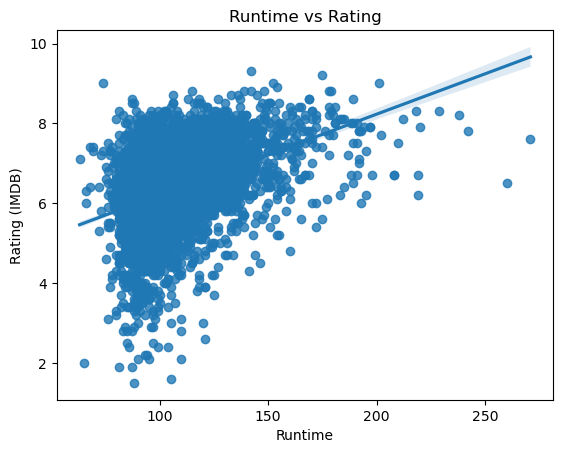

In [667]:
# plot of runtime vs average rating
rt_ratplt = sns.regplot(data=moviesDF,y="movie_averageRating",x="runtime_minutes")
rt_ratplt.set(xlabel="Runtime",ylabel="Rating (IMDB)",title="Runtime vs Rating")

[Text(0.5, 0, 'Runtime'),
 Text(0, 0.5, 'Wordwide gross $'),
 Text(0.5, 1.0, 'Runtime vs Gross')]

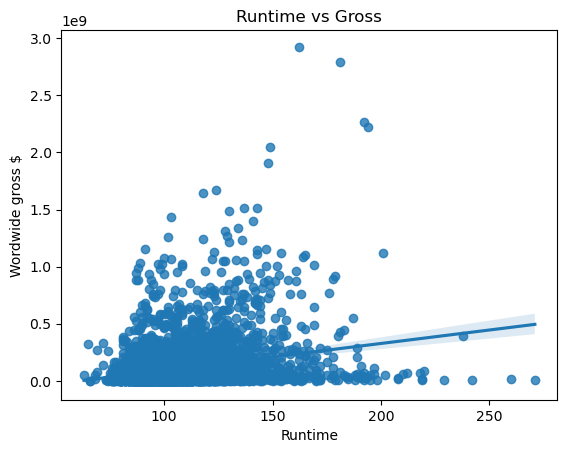

In [668]:
# plot of runtime vs gross
rt_grplt = sns.regplot(data=moviesDF,y="Worldwide gross $",x="runtime_minutes")
rt_grplt.set(xlabel="Runtime",ylabel="Wordwide gross $",title="Runtime vs Gross")

<Axes: xlabel='relative_age', ylabel='runtime_minutes'>

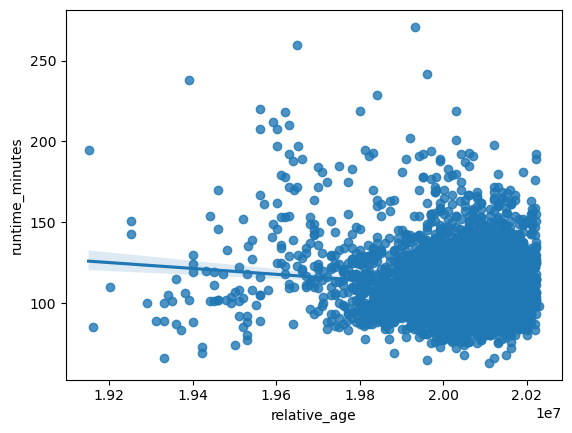

In [669]:
# plot of age vs runtime - not used shown in writeup
sns.regplot(data=moviesDF,x="relative_age",y="runtime_minutes")

<Axes: xlabel='runtime_minutes', ylabel='approval_Index'>

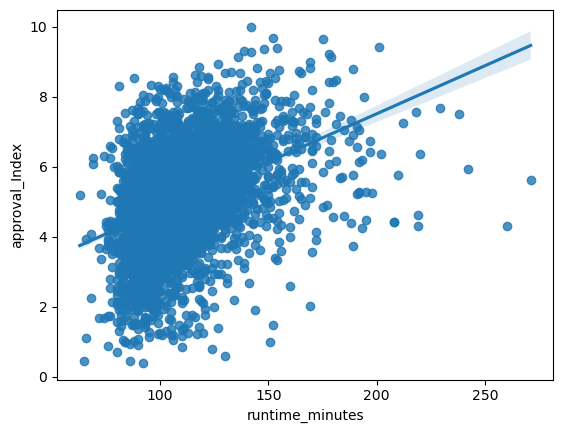

In [670]:
# plot of runtime vs approval index - not shown in writeup
sns.regplot(data=moviesDF,y="approval_Index",x="runtime_minutes")

<Axes: xlabel='runtime_minutes', ylabel='Count'>

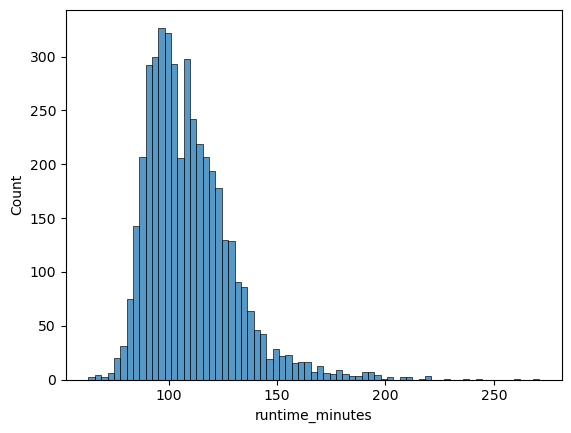

In [671]:
# overall plot of rt minutes - not shown in writeup
sns.histplot(data=moviesDF,x="runtime_minutes")

In [672]:
# get top 2000 grossers and top 20000 ratings
topgrossers = moviesDF.sort_values("Worldwide gross $",ascending=False).head(2000)["movie_title"]
topratings = moviesDF.sort_values("movie_averageRating",ascending=False).head(2000)["movie_title"]

# create new column of DF accordingly
moviesDF["top$"] = moviesDF["movie_title"].apply(lambda x: x in list(topgrossers))
moviesDF["top_rat"] = moviesDF["movie_title"].apply(lambda x: x in list(topratings))

[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Top 50% Grossing Movie Runtime')]

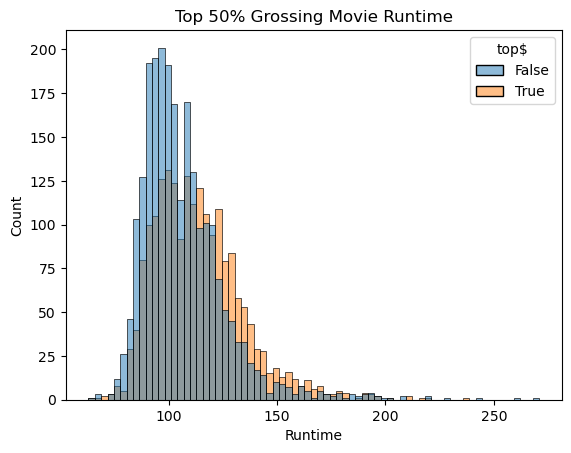

In [673]:
# plot of rt minutes split based on top 2000 gross
tmon_plt = sns.histplot(data=moviesDF,x="runtime_minutes",hue="top$")
tmon_plt.set(xlabel="Runtime",title="Top 50% Grossing Movie Runtime")

[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Top 50% Rated Movie Runtime')]

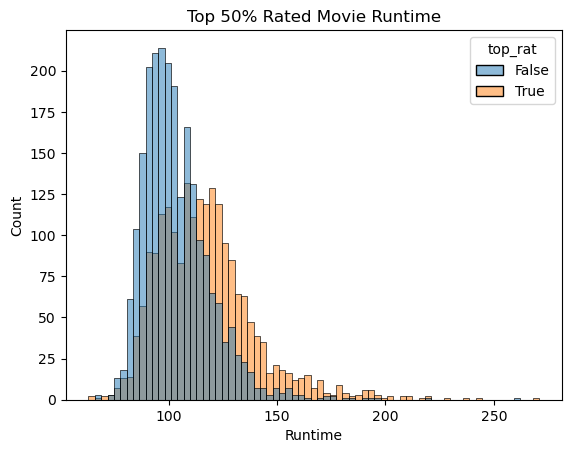

In [674]:
# plot of rt minutes split based on top 2000 ratings
tr_plt = sns.histplot(data=moviesDF,x="runtime_minutes",hue="top_rat")
tr_plt.set(xlabel="Runtime",title="Top 50% Rated Movie Runtime")

<Axes: xlabel='top_rat', ylabel='runtime_minutes'>

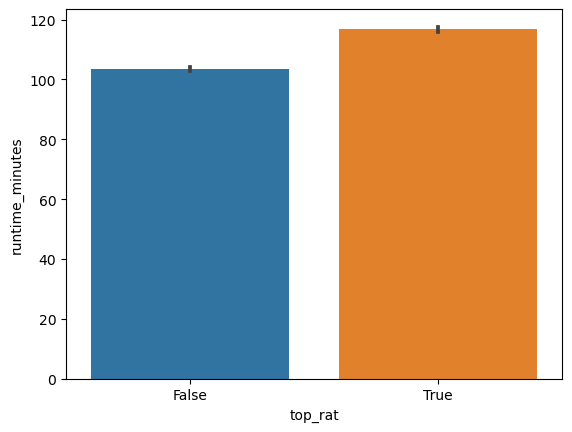

In [675]:
# barplot of above top rating info - not shown in writeup
sns.barplot(data=moviesDF,y="runtime_minutes",x="top_rat")

<Axes: xlabel='top$', ylabel='runtime_minutes'>

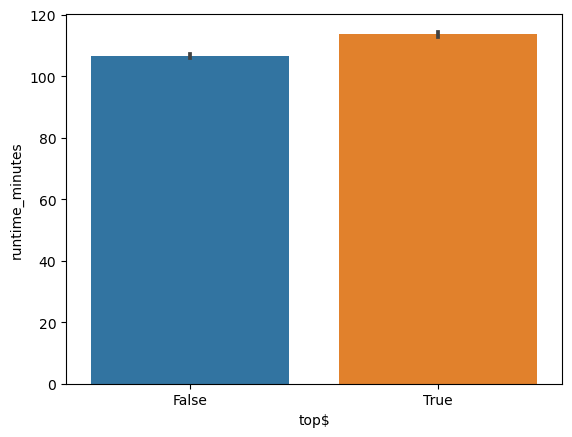

In [676]:
# barplot of above top grossers info - not shown in writeup
sns.barplot(data=moviesDF,y="runtime_minutes",x="top$")

<Axes: xlabel='top_rat', ylabel='runtime_minutes'>

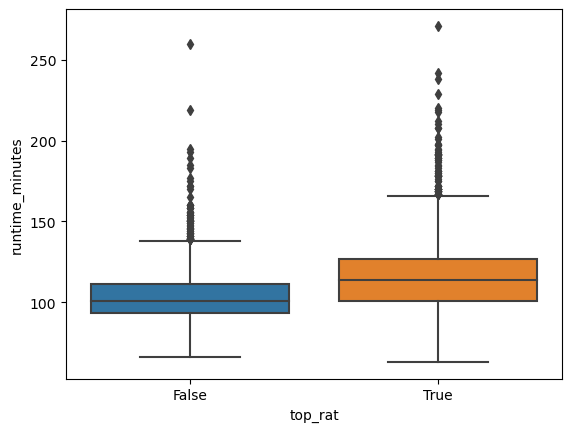

In [677]:
# box plot of above top ratings info - not shown in writeup
sns.boxplot(data=moviesDF,y="runtime_minutes",x="top_rat")

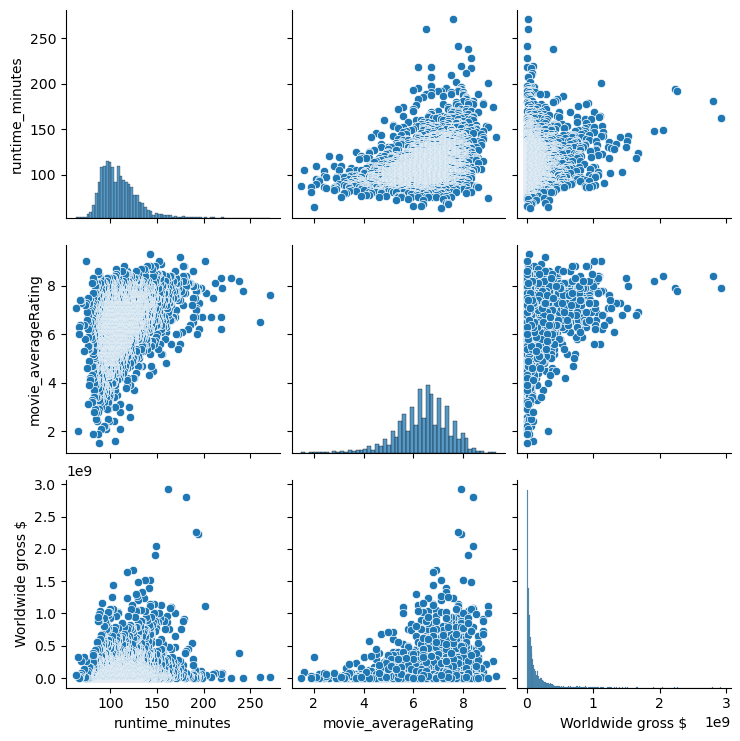

In [678]:
#pair plot of runtime, rating, gross - not shown in writeup
sns.pairplot(moviesDF[["runtime_minutes","movie_averageRating","Worldwide gross $"]])

In [679]:
# creation of Year column - found this would be better than relative age created earlier
moviesDF["Year"] = moviesDF["production_date"].apply(lambda x: int(x[:4]))
moviesDF

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,relative_age,top$,top_rat,Year
2114,Gettysburg,1993-10-08,"Drama,History,War",271.0,Ron Maxwell,"director,producer,writer",1949,alive,7.6,29736.0,5.627693,25000000,10731997,10731997,19931008,False,True,1993
2414,The Greatest Story Ever Told,1965-02-15,"Biography,Drama,History",260.0,-,-,-,-,6.5,10764.0,4.308116,20000000,15473333,15473333,19650215,False,False,1965
2591,Hamlet,1996-12-25,Drama,242.0,Kenneth Branagh,"actor,producer,director",1960,alive,7.8,38679.0,5.930156,18000000,4501094,7129670,19961225,False,True,1996
3850,Gone with the Wind,1939-12-15,"Drama,Romance,War",238.0,-,-,-,-,8.2,318573.0,7.513152,3900000,198680470,390525192,19391215,True,True,1939
1857,Once Upon a Time in America,1984-06-01,"Crime,Drama",229.0,Sergio Leone,"assistant_director,writer,director",1929,1989,8.3,355467.0,7.673301,30000000,5321508,5576072,19840601,False,True,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,Brothers,2015-08-13,Documentary,68.0,Wojciech Staron,"cinematographer,camera_department,miscellaneous",1973,alive,7.4,81.0,2.260754,13000000,656688,17856688,20150813,False,True,2015
4337,She Done Him Wrong,1933-02-09,"Comedy,Drama,History",66.0,Lowell Sherman,"actor,director,producer",1888,1934,6.3,6346.0,3.926585,200000,2200000,2200000,19330209,False,False,1933
4139,Playback,2012-03-16,Documentary,66.0,-,-,-,-,6.0,16.0,1.092132,1500000,264,54945,20120316,False,False,2012
376,The Hunchback of Notre Dame,1996-06-21,Animation,65.0,Roswitha Haas,"director,writer,producer",1940,2015,2.0,52.0,0.449597,100000000,100138851,325500000,19960621,True,True,1996


In [680]:
# get average rating, runtime, money/gross, and budget
avgrat = moviesDF.groupby("Year").agg({"movie_averageRating":np.mean})
avgrt = moviesDF.groupby("Year").agg({"runtime_minutes":np.mean})
avgmon = moviesDF.groupby("Year").agg({"Worldwide gross $":np.mean})
avgbud = moviesDF.groupby("Year").agg({"Production budget $":np.mean})

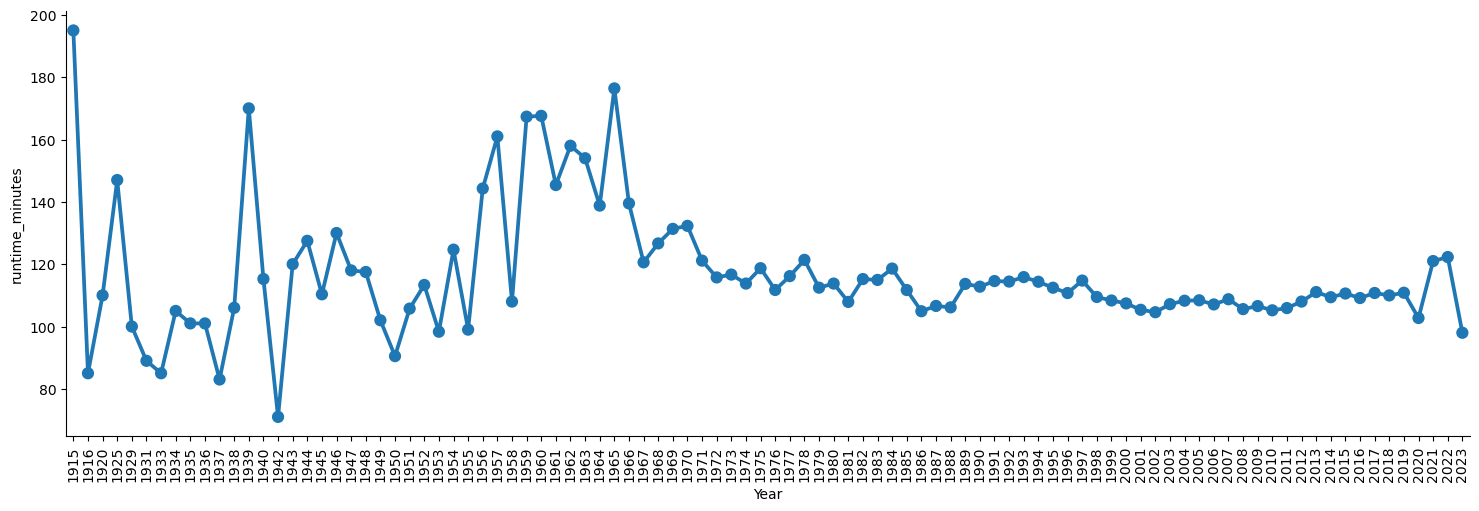

In [681]:
# plot of average runtime per year
sns.catplot(data=avgrt.reset_index(),x="Year",y="runtime_minutes",aspect=3,kind="point").set_xticklabels(rotation=90)

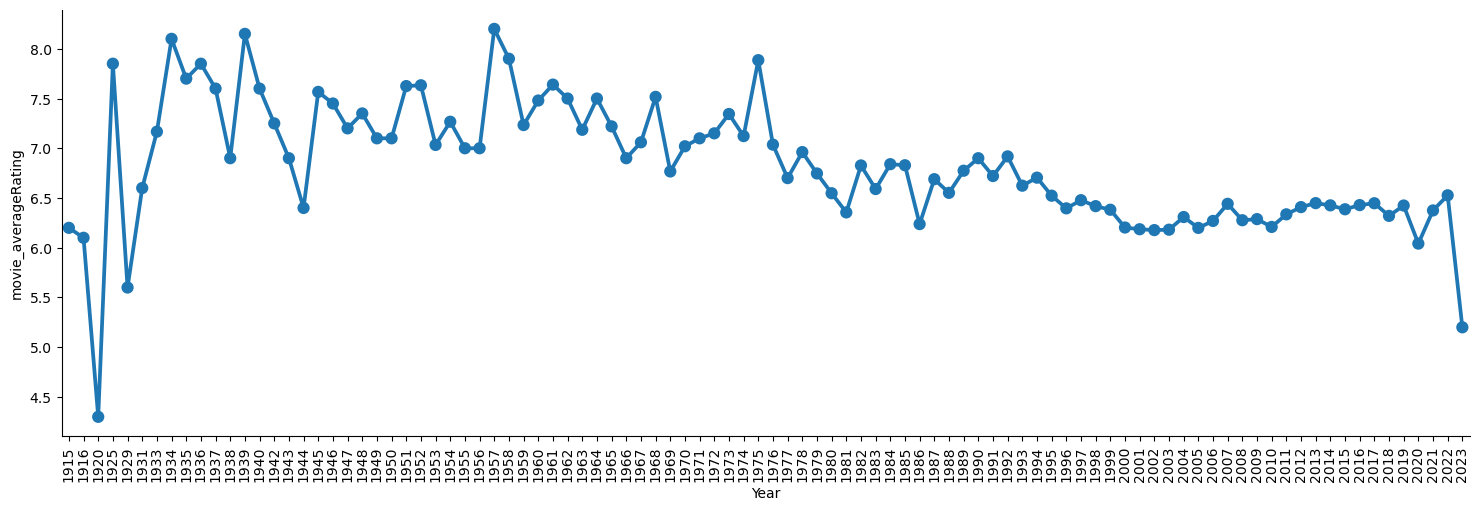

In [682]:
# plot of average rating per year - not shown in writeup
sns.catplot(data=avgrat.reset_index(),x="Year",y="movie_averageRating",aspect=3,kind="point").set_xticklabels(rotation=90)

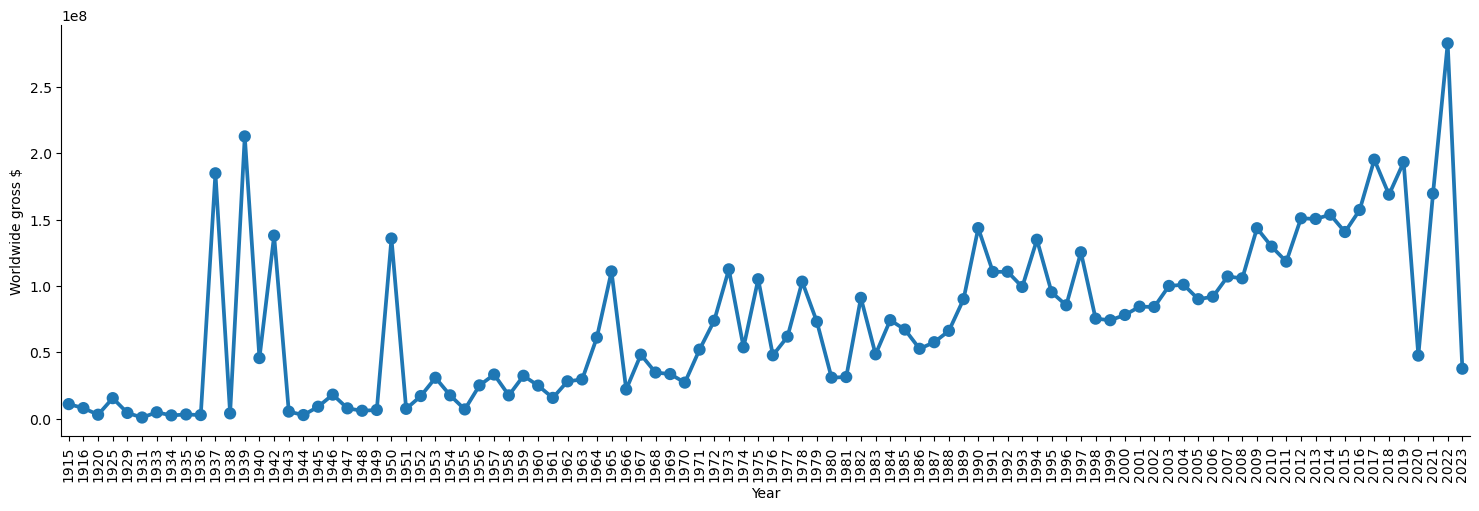

In [683]:
# plot of average gross per year - not shown in writeup
sns.catplot(data=avgmon.reset_index(),x="Year",y="Worldwide gross $",aspect=3,kind="point").set_xticklabels(rotation=90)

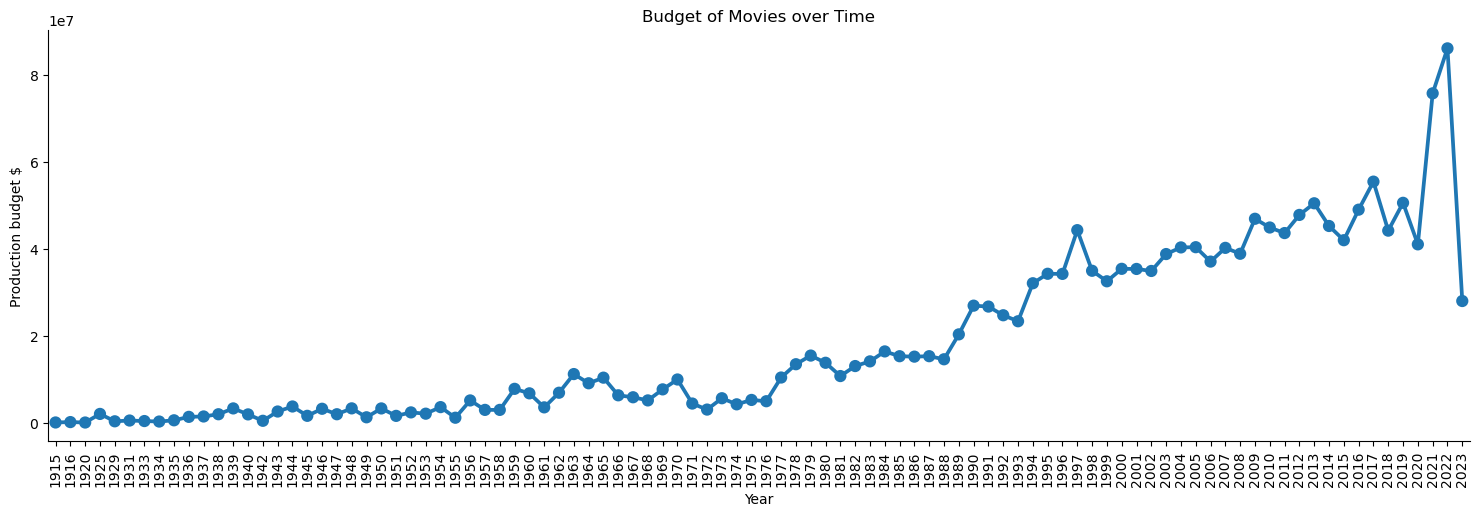

In [684]:
# plot of average budget per year
budplt = sns.catplot(data=avgbud.reset_index(),x="Year",y="Production budget $",aspect=3,kind="point").set_xticklabels(rotation=90)
budplt.set(xlabel="Year",ylabel="Production budget $",title="Budget of Movies over Time")

[Text(0.5, 0, 'Production budget $'),
 Text(0, 0.5, 'Runtime'),
 Text(0.5, 1.0, 'Budget vs Runtime')]

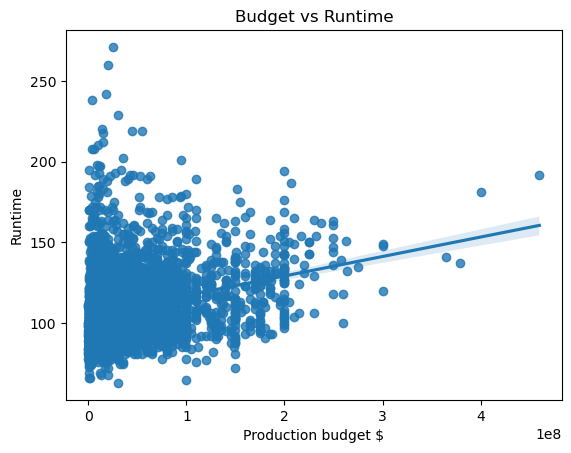

In [685]:
# plot of budget vs runtime
bud_min = sns.regplot(data=moviesDF,x="Production budget $",y="runtime_minutes")
bud_min.set(xlabel="Production budget $",ylabel="Runtime",title="Budget vs Runtime")

<Axes: xlabel='Year', ylabel='Count'>

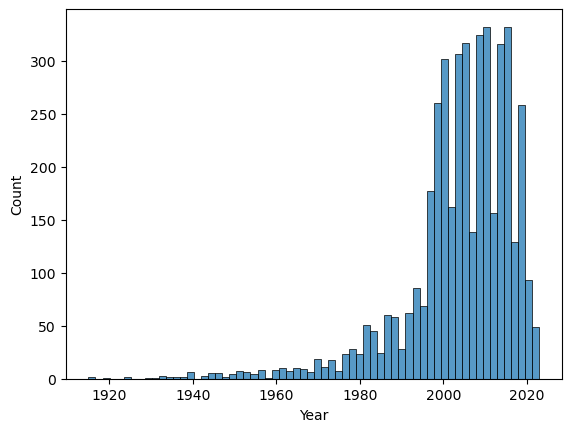

In [686]:
# histogram of movies by year - not shown in writeup
sns.histplot(data=moviesDF,x="Year")

<Axes: xlabel='runtime_minutes', ylabel='prim_genre'>

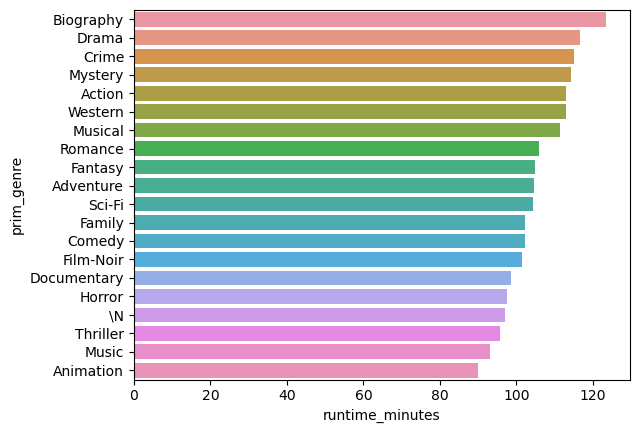

In [687]:
# creation of primary genre - used temporarily before I decided to include all genres, not just first one
# not shown in writeup
moviesDF["prim_genre"] = moviesDF["genres"].apply(lambda x: x.split(",")[0])

# plot of runtime by primary genre - not shown in writeup
rt_agg = moviesDF.groupby("prim_genre").agg({"runtime_minutes":np.mean}).reset_index()
rt_agg = rt_agg.sort_values("runtime_minutes",ascending=False)
sns.barplot(data=moviesDF,x="runtime_minutes",y="prim_genre",errorbar=None,order=rt_agg["prim_genre"])

<Axes: xlabel='movie_averageRating', ylabel='prim_genre'>

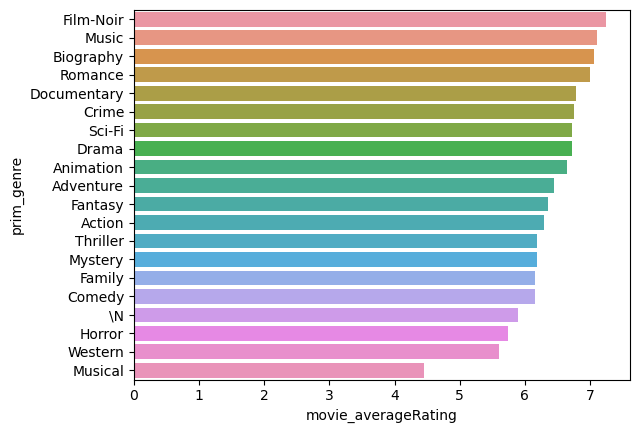

In [688]:
# plot of ratings by primary genre - not shown in writeup
rat_agg = moviesDF.groupby("prim_genre").agg({"movie_averageRating":np.mean}).reset_index()
rat_agg = rat_agg.sort_values("movie_averageRating",ascending=False)
sns.barplot(data=moviesDF,x="movie_averageRating",y="prim_genre",errorbar=None,order=rat_agg["prim_genre"])

<Axes: xlabel='Worldwide gross $', ylabel='prim_genre'>

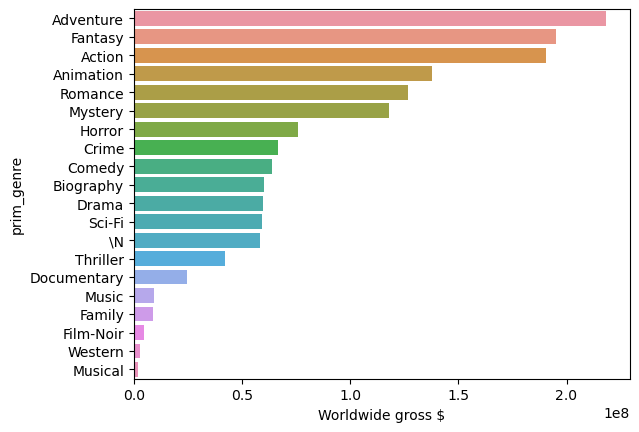

In [689]:
# plot of gross by primary genre - not shown in writeup
mon_agg = moviesDF.groupby("prim_genre").agg({"Worldwide gross $":np.mean}).reset_index()
mon_agg = mon_agg.sort_values("Worldwide gross $",ascending=False)
sns.barplot(data=moviesDF,x="Worldwide gross $",y="prim_genre",errorbar=None,order=mon_agg["prim_genre"])

In [690]:
# creation of genre list
moviesDF["genre_list"] = moviesDF["genres"].apply(lambda x: x.split(","))

agg_dict = {}

# creation of new dataframe holding average runtime, rating, and gross for each genre

# loop through movies
for x in range(len(moviesDF)):
    # get row
    row = moviesDF.loc[x]
    for y in row["genre_list"]:
        if y != "\\N":
            # add to count (first spot in array), total runtime, (second), total rating (third), and total gross
            if y in agg_dict:
                agg_dict[y][0] += 1
                
                agg_dict[y][1] += row["runtime_minutes"]
                agg_dict[y][2] += row["movie_averageRating"]
                agg_dict[y][3] += row["Worldwide gross $"]
            else:
                agg_dict[y] = []
                agg_dict[y].append(1)
                agg_dict[y].append(row["runtime_minutes"])
                agg_dict[y].append(row["movie_averageRating"])
                agg_dict[y].append(row["Worldwide gross $"])
                
# get average runtime, rating, and total gross for each genre
for x in agg_dict:
    agg_dict[x][1] /= agg_dict[x][0]
    agg_dict[x][2] /= agg_dict[x][0]
    agg_dict[x][3] /= agg_dict[x][0]
                
agg_df = pd.DataFrame(agg_dict)

# looked up how to do transpose on pandas website
agg_df = agg_df.T

agg_df = agg_df.sort_values(0,ascending=False).reset_index()

agg_df

,index,0,1,2,3
0,Drama,2210.0,115.839367,6.707511,7.344272e+07
1,Comedy,1656.0,101.757246,6.176570,1.035291e+08
2,Action,1211.0,113.061932,6.297770,1.904797e+08
3,Adventure,968.0,110.934917,6.375000,2.536851e+08
4,Crime,780.0,110.428205,6.463077,7.701028e+07
5,Romance,724.0,109.995856,6.334392,6.861444e+07
6,Thriller,668.0,108.562874,6.294611,1.073479e+08
7,Horror,456.0,99.535088,5.844079,7.046433e+07
8,Mystery,409.0,108.229829,6.332518,8.567364e+07
9,Sci-Fi,379.0,112.559367,6.330079,2.242916e+08


[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

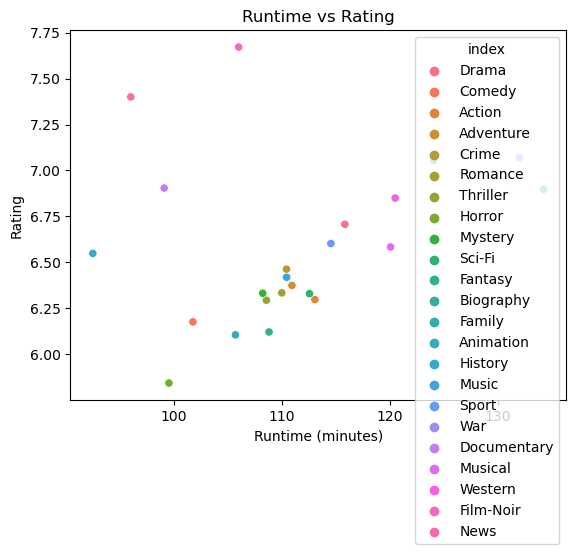

In [691]:
# plot of runtime vs rating for each genre

RTvsRat = sns.scatterplot(x=1,y=2,data=agg_df,hue="index")
RTvsRat.set(xlabel="Runtime (minutes)",ylabel="Rating",title="Runtime vs Rating")

[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Gross'),
 Text(0.5, 1.0, 'Runtime vs Gross')]

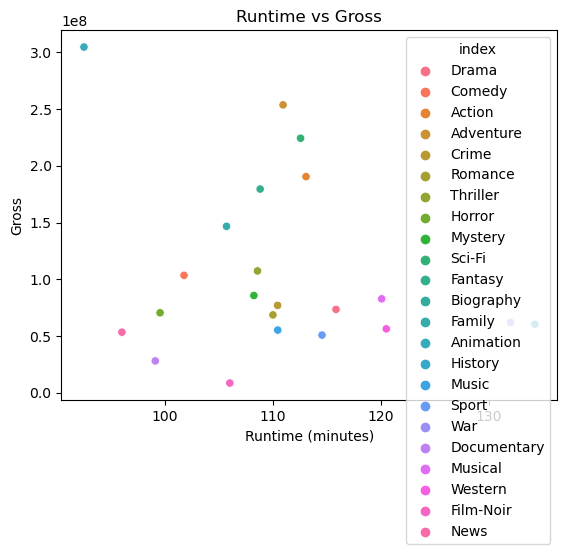

In [692]:
#plot of runtime vs gross for each genre

RTvsMon = sns.scatterplot(x=1,y=3,data=agg_df,hue="index")
RTvsMon.set(xlabel="Runtime (minutes)",ylabel="Gross",title="Runtime vs Gross")

[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Runtime by Genre')]

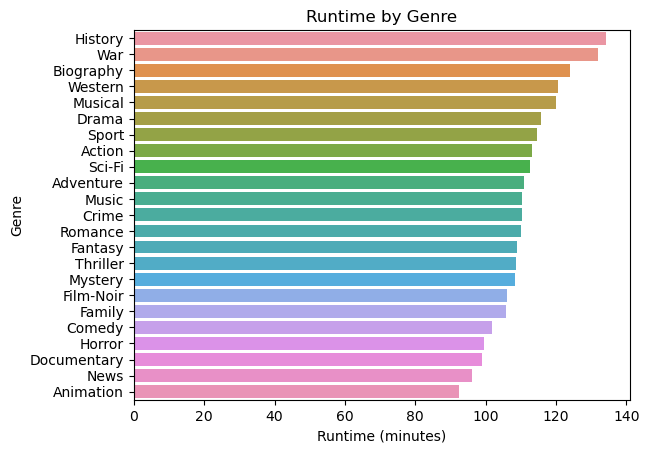

In [693]:
# plot of runtime by genre

Gen_rt =sns.barplot(data=agg_df.sort_values(1,ascending=False),x=1,y="index")
Gen_rt.set(xlabel="Runtime (minutes)",ylabel="Genre",title="Runtime by Genre")

[Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Rating by Genre')]

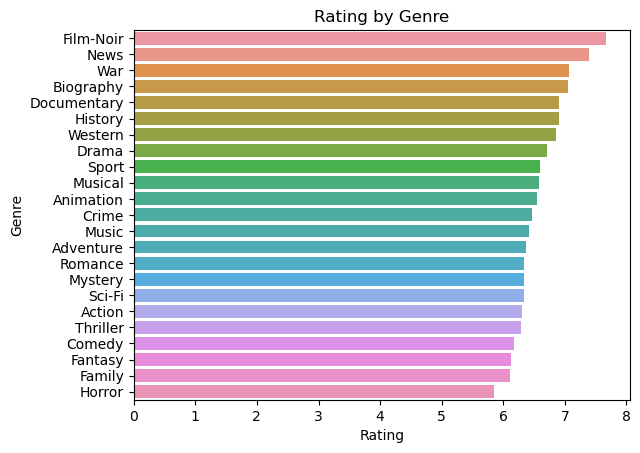

In [694]:
# plot of rating by genre

Gen_rat =sns.barplot(data=agg_df.sort_values(2,ascending=False),x=2,y="index")
Gen_rat.set(xlabel="Rating",ylabel="Genre",title="Rating by Genre")

[Text(0.5, 0, 'Gross'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Gross by Genre')]

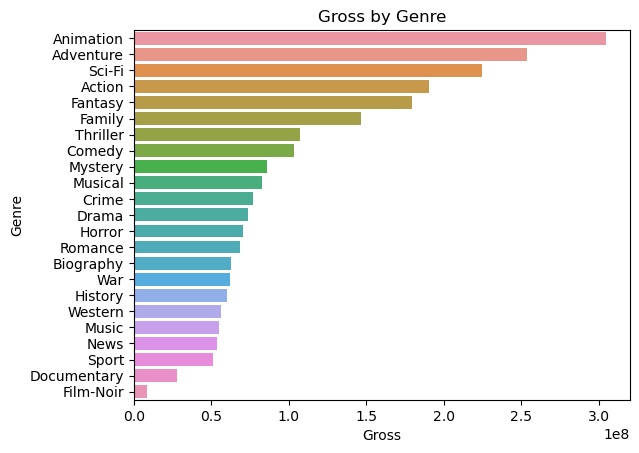

In [695]:
#plot of gross by genre

Gen_mon =sns.barplot(data=agg_df.sort_values(3,ascending=False),x=3,y="index")
Gen_mon.set(xlabel="Gross",ylabel="Genre",title="Gross by Genre")

[Text(0.5, 0, '# of Movies'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Film Number by Genre')]

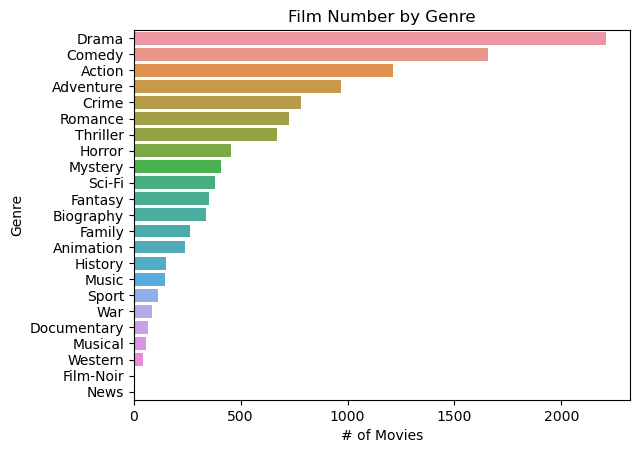

In [696]:
# plot of film number by genre - not shown in writeup

Gen_mov =sns.barplot(data=agg_df.sort_values(0,ascending=False),x=0,y="index")
Gen_mov.set(xlabel="# of Movies",ylabel="Genre",title="Film Number by Genre")

In [697]:
# I used another data set initially and realised that it was a little redundant with MovieDF - not discussed in writeup

IMDB_df = pd.read_csv("IMDB.csv")

# transfer string to mins
def to_mins(st):
    mins = 0
    hr = st.split()[0][-2]
    if hr.isnumeric():
        mins += int(hr) * 60
    
    if len(list(st.split())) > 1:
        mn = st.split()[1][-3:-1]
        if (mn.isnumeric()):
            mins += int(mn)

    return mins

IMDB_df["mins"] = IMDB_df["run_time"].apply(lambda x: to_mins(x))

IMDB_df

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,mins
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",142
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",175
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",152
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",202
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett",146
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev",142
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott",90
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley,191


<Axes: xlabel='mins', ylabel='Count'>

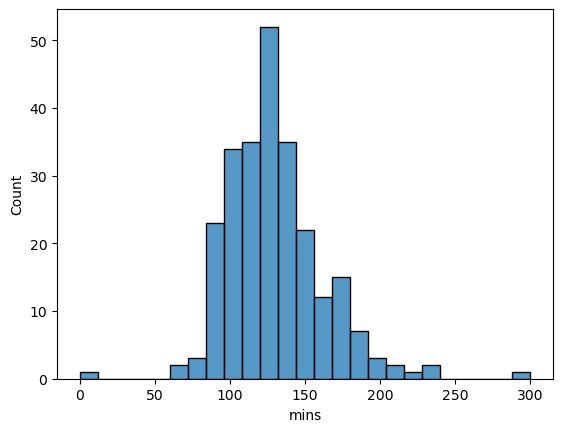

In [698]:
# IMDB runtimes plot - not shown in writeup

sns.histplot(data=IMDB_df,x="mins")

In [699]:
#same aggregate DF data approach for IMDB 

IMDB_df["genre_list"] = IMDB_df["genre"].apply(lambda x: x.split(","))

agg_dict2 = {}

for x in range(len(IMDB_df)):
    row = IMDB_df.loc[x]
    for y in row["genre_list"]:
        if y in agg_dict2:
            agg_dict2[y][0] += 1

            agg_dict2[y][1] += row["mins"]
            agg_dict2[y][2] += row["rating"]
            if row["box_office"].isnumeric():
                agg_dict2[y][3] += int(row["box_office"])
        else:
            agg_dict2[y] = []
            agg_dict2[y].append(1)
            agg_dict2[y].append(row["mins"])
            agg_dict2[y].append(row["rating"])
            agg_dict2[y].append(int(row["box_office"]))
                               

for x in agg_dict2:
    agg_dict2[x][1] /= agg_dict2[x][0]
    agg_dict2[x][2] /= agg_dict2[x][0]
    agg_dict2[x][3] /= agg_dict2[x][0]        
        
agg_df2 = pd.DataFrame(agg_dict2)

agg_df2 = agg_df2.T

agg_df2 = agg_df2.reset_index()

agg_df2

,index,0,1,2,3
0,Drama,177.0,134.056497,8.320339,1.577728e+08
1,Crime,51.0,131.784314,8.360784,1.278070e+08
2,Action,50.0,138.920000,8.350000,4.897011e+08
3,Biography,29.0,147.068966,8.248276,1.209014e+08
4,History,10.0,156.000000,8.270000,1.082734e+08
5,Adventure,60.0,130.116667,8.300000,4.960550e+08
6,Western,7.0,153.857143,8.328571,1.514506e+08
7,Romance,23.0,129.565217,8.295652,7.110951e+07
8,Sci-Fi,20.0,131.700000,8.360000,3.984243e+08
9,Fantasy,14.0,123.571429,8.307143,4.418276e+08


[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Runtime by Genre')]

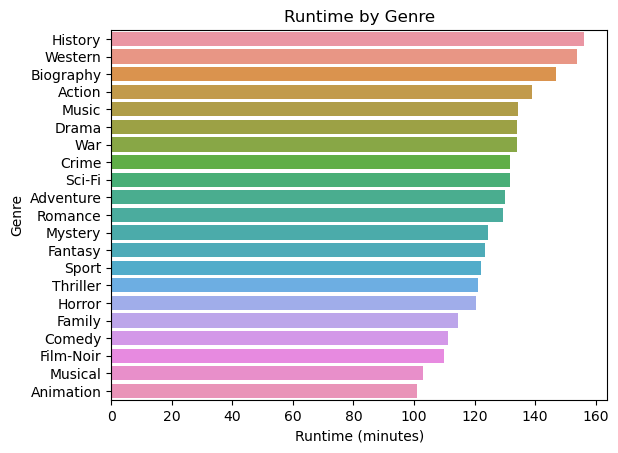

In [700]:
#IMDB runtime by genre - not shown in writeup

Gen_rt2 =sns.barplot(data=agg_df2.sort_values(1,ascending=False),x=1,y="index")
Gen_rt2.set(xlabel="Runtime (minutes)",ylabel="Genre",title="Runtime by Genre")

[Text(0.5, 0, '# of Movies'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Number of Films by Genre')]

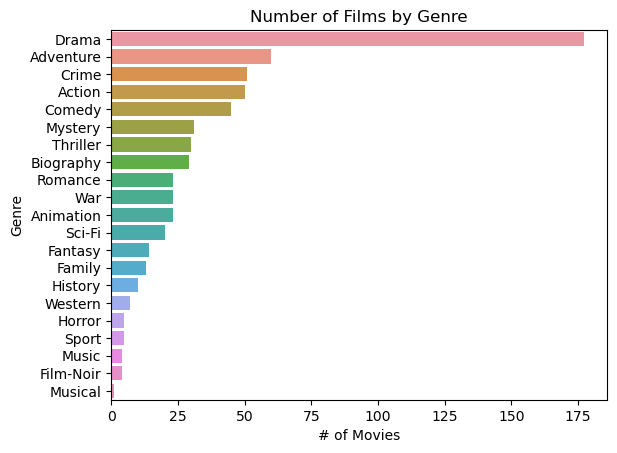

In [701]:
#IMDB number of films by genre - not shown in writeup

Gen_rt2 =sns.barplot(data=agg_df2.sort_values(0,ascending=False),x=0,y="index")
Gen_rt2.set(xlabel="# of Movies",ylabel="Genre",title="Number of Films by Genre")

[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

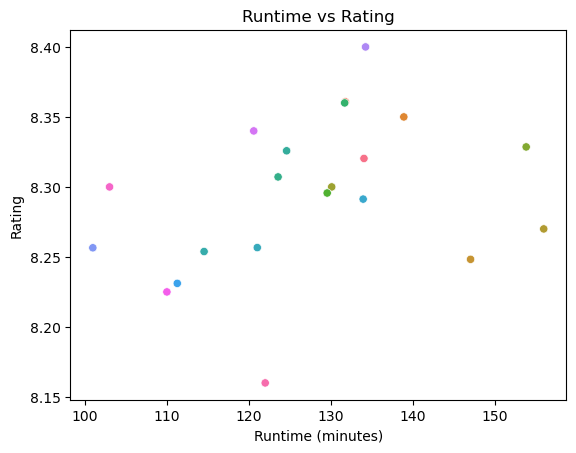

In [702]:
#IMDB runtime vs rating by genre - not shown in writeup

RTvsRat2 = sns.scatterplot(x=1,y=2,data=agg_df2,hue="index",legend=None)
RTvsRat2.set(xlabel="Runtime (minutes)",ylabel="Rating",title="Runtime vs Rating")

[Text(0.5, 0, 'Runtime (minutes)'),
 Text(0, 0.5, 'Gross'),
 Text(0.5, 1.0, 'Gross vs Rating')]

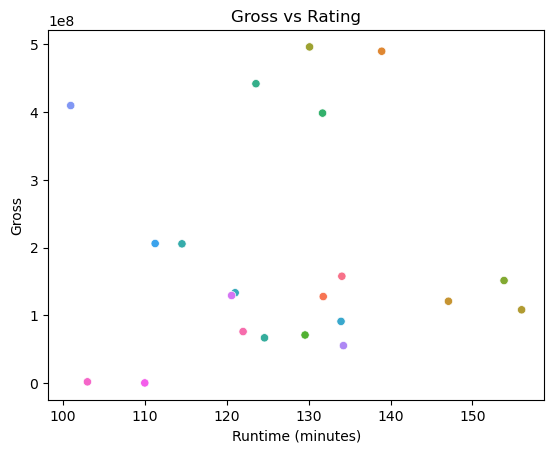

In [703]:
#IMDB runtime vs gross by genre - not shown in writeup

RTvsMon2 = sns.scatterplot(x=1,y=3,data=agg_df2,hue="index",legend=None)
RTvsMon2.set(xlabel="Runtime (minutes)",ylabel="Gross",title="Gross vs Rating")

<Axes: xlabel='Year', ylabel='runtime_minutes'>

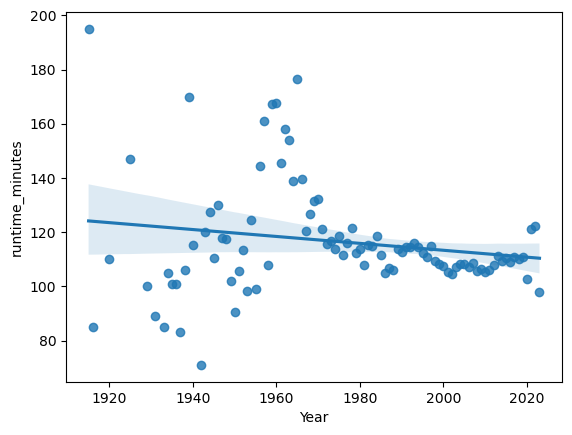

In [704]:
# plot of average runtime per year - not shown in writeup

avg_per_yr = moviesDF.groupby("Year").agg({"runtime_minutes":np.mean}).reset_index()

sns.regplot(data=avg_per_yr,x="Year",y="runtime_minutes")

In [705]:
# see how many 2023 movies
moviesDF.loc[moviesDF["Year"]==2023]

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,relative_age,top$,top_rat,Year,prim_genre,genre_list
1923,80 for Brady,2023-02-03,"Comedy,Drama,Sport",98.0,Kyle Marvin,"director,producer,actor",\N,alive,5.2,359.0,2.119074,28000000,37688000,37688000,20230203,False,False,2023,Comedy,"[Comedy, Drama, Sport]"


<Axes: xlabel='year', ylabel='mins'>

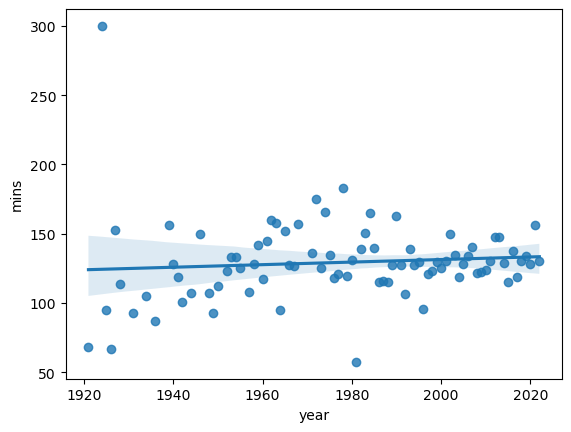

In [706]:
#IMDB average runtime per year - not shown in writeup

avg_per_yr_imdb = IMDB_df.groupby("year").agg({"mins":np.mean}).reset_index()

sns.regplot(data=avg_per_yr_imdb,x="year",y="mins")

<Axes: xlabel='year', ylabel='mins'>

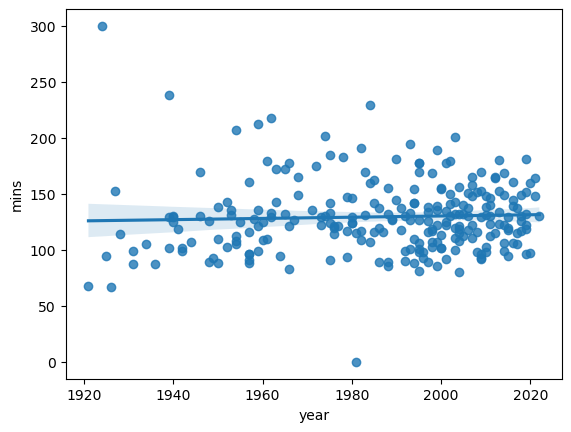

In [707]:
#IMDB runtime by year - not shown in writeup

sns.regplot(data=IMDB_df,x="year",y="mins")

In [708]:
# DATA SET 2 - OSCARS

oscar_df = pd.read_csv("the_oscar_award.csv")

oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [709]:
# create data frame of oscar movies in other DF so as to get runtime, rating, and gross numbers

oscar_mov_df = pd.DataFrame({})

for x in oscar_df["film"]:
    if x in list(moviesDF["movie_title"]):
        mov_df = moviesDF[["movie_title","runtime_minutes","movie_averageRating","Worldwide gross $","Year"]].loc[moviesDF["movie_title"]==x]
        oscar_mov_df = pd.concat([oscar_mov_df,mov_df])

In [710]:
oscar_mov_df = oscar_mov_df.sort_values("runtime_minutes",ascending=False)

oscar_mov_df

,movie_title,runtime_minutes,movie_averageRating,Worldwide gross $,Year
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
2414,The Greatest Story Ever Told,260.0,6.5,15473333,1965
...,...,...,...,...,...
4235,Bambi,69.0,7.3,268000000,1942
4337,She Done Him Wrong,66.0,6.3,2200000,1933
376,The Hunchback of Notre Dame,65.0,2.0,325500000,1996
376,The Hunchback of Notre Dame,65.0,2.0,325500000,1996


[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Oscar Runtimes')]

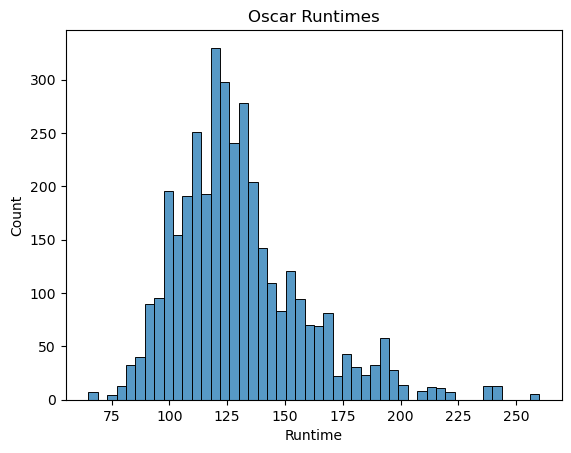

In [711]:
# Oscar runtime plot

oscplt = sns.histplot(data=oscar_mov_df,x="runtime_minutes")
oscplt.set(xlabel="Runtime",title="Oscar Runtimes")

In [712]:
# new data fram for just Best Picutres

bp_df = oscar_df.loc[oscar_df["winner"]==True]
bp_df = bp_df.loc[bp_df["category"]=="BEST PICTURE"]

bp_df

,year_film,year_ceremony,ceremony,category,name,film,winner
3923,1962,1963,35,BEST PICTURE,"Sam Spiegel, Producer",Lawrence of Arabia,True
4049,1963,1964,36,BEST PICTURE,"Tony Richardson, Producer",Tom Jones,True
4173,1964,1965,37,BEST PICTURE,"Jack L. Warner, Producer",My Fair Lady,True
4295,1965,1966,38,BEST PICTURE,"Robert Wise, Producer",The Sound of Music,True
4418,1966,1967,39,BEST PICTURE,"Fred Zinnemann, Producer",A Man for All Seasons,True
...,...,...,...,...,...,...,...
10219,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True
10350,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True
10474,2020,2021,93,BEST PICTURE,"Frances McDormand, Peter Spears, Mollye Asher,...",Nomadland,True
10591,2021,2022,94,BEST PICTURE,"Philippe Rousselet, Fabrice Gianfermi and Patr...",CODA,True


In [713]:
# new data frame of best pictures with runtime, rating and gross info

oscar_bp_df = pd.DataFrame({})

for x in bp_df["film"]:
    if x in list(moviesDF["movie_title"]):
        movbp_df = moviesDF[["movie_title","runtime_minutes","movie_averageRating","Worldwide gross $","Year"]].loc[moviesDF["movie_title"]==x]
        oscar_bp_df = pd.concat([oscar_bp_df,movbp_df])

oscar_bp_df

,movie_title,runtime_minutes,movie_averageRating,Worldwide gross $,Year
2754,Lawrence of Arabia,218.0,8.3,69995047,1962
4177,Tom Jones,129.0,6.4,37600000,1963
2617,My Fair Lady,170.0,7.8,72072607,1964
3384,The Sound of Music,172.0,8.1,286214195,1965
3851,A Man for All Seasons,120.0,7.7,28350000,1966
4042,In the Heat of the Night,110.0,7.9,24407647,1967
3159,Oliver!,153.0,7.4,37402877,1968
3862,Midnight Cowboy,113.0,7.8,44796329,1969
2998,Patton,172.0,7.9,62500000,1970
4034,The French Connection,104.0,7.7,41159421,1971


[Text(0.5, 0, 'Runtime'), Text(0.5, 1.0, 'Oscar Best Picture Runtimes')]

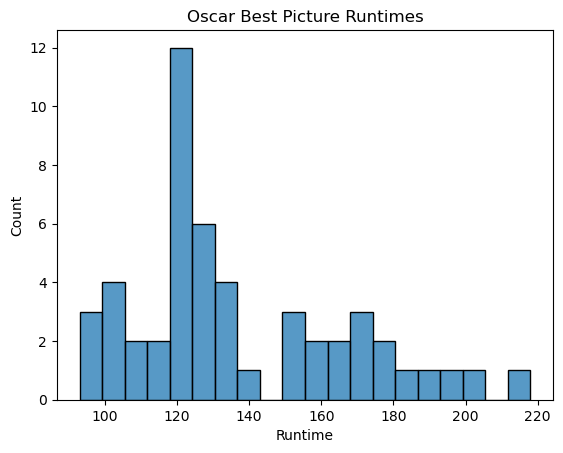

In [714]:
# plot of oscar best picture runtimes

bp_win_plt = sns.histplot(data=oscar_bp_df,x="runtime_minutes",bins=20)
bp_win_plt.set(xlabel="Runtime",title="Oscar Best Picture Runtimes")

<Axes: xlabel='mins', ylabel='Count'>

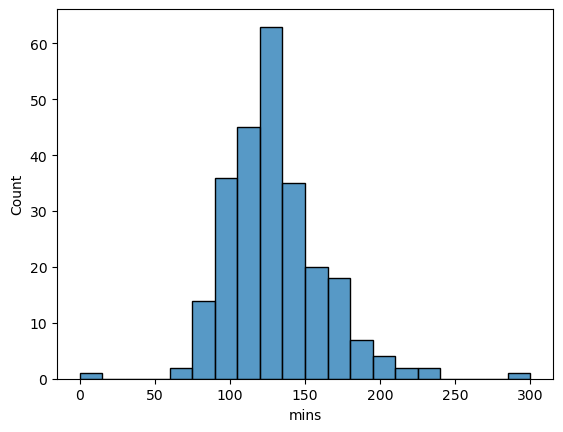

In [715]:
# plot of IMDB data by runtime

sns.histplot(data=IMDB_df,x="mins",bins=20)

In [716]:
# DATA SET 3 - OMDB API

key = "ae599b48"
url = "http://www.omdbapi.com/?apikey="+key+"&t="+title+"&format=json"

query = requests.get(url).json()

query["Ratings"][1]["Value"][:2]

print("Metascore" in query)

True


In [717]:
def is_float(x):
    # I looked this up here after trying to solve it myself
    # because I was running out of api calls--> https://pythonhow.com/how/check-if-a-string-is-a-float/
    try:
        float(x)
        return True
    except ValueError:
        return False

#get info from api
def get_info(title):
    key = "ae599b48"
    url = "http://www.omdbapi.com/?apikey="+key+"&t="+title+"&format=json"

    query = requests.get(url).json()
    
    ratings = []
    
    # check if metascore, imdb, and ratings in query
    if ("Metascore" in query and "imdbRating" in query and "Ratings" in query):
        #check if floats
        if is_float(query["Metascore"]) and is_float(query["imdbRating"]) and is_float(query["Ratings"][1]["Value"][:-1]):
            ratings = [float(query["Metascore"])/10.0,float(query["imdbRating"]),float(query["Ratings"][1]["Value"][:-1])/10.0]  
    
    return ratings

In [718]:
is_float("egg")

False

In [719]:
get_info("moonlight")

[9.9, 7.4, 9.8]

In [720]:
# creation of dictionary with ratings

rat_dict = {}

for x in moviesDF["movie_title"].head(600):
    rat_dict[x] = get_info(x)
    
rat_dict

{'Gettysburg': [],
 'The Greatest Story Ever Told': [],
 'Hamlet': [],
 'Gone with the Wind': [9.7, 8.2, 9.0],
 'Once Upon a Time in America': [7.5, 8.3, 8.7],
 'The Ten Commandments': []}

In [721]:
# creation of new data frame with all ratings

rat_dict_2 = {}

for x in rat_dict:
    if len(rat_dict[x]) > 0:
        rat_dict_2[x] = rat_dict[x]

rat_df = pd.DataFrame(rat_dict_2)

rat_df = rat_df.T

rat_df.columns = ["Metascore","IMDB","RottenTomatoes"]

rat_df = rat_df.reset_index()

rat_df

,index,Metascore,IMDB,RottenTomatoes
0,Gone with the Wind,9.7,8.2,9.0
1,Once Upon a Time in America,7.5,8.3,8.7


In [722]:
# retrieved from pandas documetation website
rat_df2 = rat_df.melt('index', var_name='type', value_name='rating')

rt_list = []

for x in rat_df2["index"]:
    if x in list(moviesDF["movie_title"]):
        rt_list.append(float(list(moviesDF.loc[moviesDF["movie_title"]==x]["runtime_minutes"])[0]))

rat_df2["runtime"] = rt_list
rat_df2

,index,type,rating,runtime
0,Gone with the Wind,Metascore,9.7,238.0
1,Once Upon a Time in America,Metascore,7.5,229.0
2,Gone with the Wind,IMDB,8.2,238.0
3,Once Upon a Time in America,IMDB,8.3,229.0
4,Gone with the Wind,RottenTomatoes,9.0,238.0
5,Once Upon a Time in America,RottenTomatoes,8.7,229.0


[Text(0.5, 0, 'Runtime'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Runtime vs Rating')]

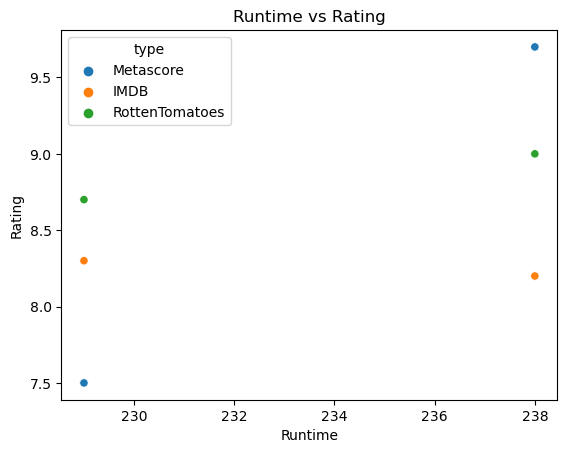

In [723]:
# plot of runtime vs rating based on ratings
rat_plt = sns.scatterplot(data=rat_df2,x="runtime",y="rating",hue="type")
rat_plt.set(xlabel="Runtime",ylabel="Rating",title="Runtime vs Rating")